## Problem Statement

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [1]:
#importing required lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the dataset
dataset = pd.read_csv("Car_Data.csv",index_col=0,na_values="-")
dataset.head()

,Brand,Model,Variant,Year,driven kilometers,fuel,Transmission,number of owners,location,Price
0,Mah,Logan,Others,2010.0,127000.0 KM,DIESEL,MANUAL,1st,Jaysingpur,"2,50,000"
1,Hyundai,Santro X,NaN,2007.0,45000.0 KM,PETROL,MANUAL,2nd,Coimbatore,"2,10,000"
2,Ford,Ecosport,1.5 Diesel Trend,2015.0,20 KM,DIESEL,MANUAL,2nd,Wardha,"6,51,000"
3,Maruti Suzuki,Alto K10,VXI Airbag,2016.0,58734 KM,PETROL,MANUAL,First,Bengaluru,"3,30,000"
4,Maruti Suzuki,Swift Dzire Tour,LDI,2018.0,61000.0 KM,DIESEL,MANUAL,1st,Visakhapatnam,"6,20,000"


In [3]:
# Copying dataset
data = dataset.copy()

In [4]:
data.shape

(455, 10)

In [6]:
data.isnull().sum()

Brand                20
Model                20
Variant              39
Year                 20
driven kilometers    20
fuel                 20
Transmission         20
number of owners     20
location             20
Price                20
dtype: int64

In [7]:
# Checking unique values
col = data.columns

for i in col:
    print(data[i].value_counts())
    print("--------------------------------------")

Maruti Suzuki     122
Hyundai            87
Honda              42
Mah                35
Toyota             28
Ford               23
Tata               14
Renault            13
Volkswagen         13
Mercedes-Benz      10
Chevrolet          10
BMW                 7
Skoda               6
Nissan              5
Audi                5
Kia                 3
Jaguar              2
Land Rover          2
Datsun              2
Volvo               1
Mitsubishi          1
Other Brands        1
Porsche             1
Isuzu               1
Jeep                1
Name: Brand, dtype: int64
--------------------------------------
City            16
Swift Dzire     16
Swift           13
Wagon R         12
Ecosport        11
                ..
Sail U-VA        1
S Cross          1
MU-X             1
Sail             1
CrossPolo        1
Name: Model, Length: 125, dtype: int64
--------------------------------------
Others                14
LXI                   11
VXI                   11
VDI                    

#### Observation :

1. We have a null values in dataset

In [42]:
data.dtypes

Brand                 object
Model                 object
Variant               object
Year                 float64
driven kilometers    float64
fuel                  object
Transmission          object
number of owners      object
location              object
Price                 object
dtype: object

In [60]:
def casting(x):
    first = ['1st','First','--','nan']
    second = ['2nd','Second',]
    third = ['3rd','Third']
    four = ['4th','4+','Fourth']
        
    if x in first:
        return 1
    elif x in second:
        return 2
    elif x in third:
        return 3
    elif x in four:
        return 4
    else:
        return 0

In [38]:
data['driven kilometers'] = data['driven kilometers'].str.split(" ").str[0].str.replace(","," ").str.strip()

In [41]:
data['driven kilometers'] = data['driven kilometers'].astype(float)

In [49]:
data['Price'] = data['Price'].str.replace(",","").str.strip().astype(float)

In [65]:
data['number of owners'] = data['number of owners'].apply(casting)

In [67]:
data.head()

,Brand,Model,Variant,Year,driven kilometers,fuel,Transmission,number of owners,location,Price
0,Mah,Logan,Others,2010.0,127000.0,DIESEL,MANUAL,1,Jaysingpur,250000.0
1,Hyundai,Santro X,NaN,2007.0,45000.0,PETROL,MANUAL,2,Coimbatore,210000.0
2,Ford,Ecosport,1.5 Diesel Trend,2015.0,20.0,DIESEL,MANUAL,2,Wardha,651000.0
3,Maruti Suzuki,Alto K10,VXI Airbag,2016.0,58734.0,PETROL,MANUAL,1,Bengaluru,330000.0
4,Maruti Suzuki,Swift Dzire Tour,LDI,2018.0,61000.0,DIESEL,MANUAL,1,Visakhapatnam,620000.0


### Checking null values

In [68]:
data.isnull().sum()

Brand                20
Model                20
Variant              39
Year                 20
driven kilometers    20
fuel                 20
Transmission         20
number of owners      0
location             20
Price                20
dtype: int64

**Observation :**
    
    Null value present in data we need to handle that.

In [69]:
### Statistical summary:
data.describe()

,Year,driven kilometers,number of owners,Price
count,435.000000,435.000000,455.000000,4.350000e+02
mean,2013.494253,59407.303448,1.338462,6.190411e+05
std,3.949781,86002.166019,0.670125,7.321627e+05
min,1998.000000,1.000000,0.000000,1.500000e+04
25%,2011.000000,23000.000000,1.000000,2.450000e+05
50%,2014.000000,52000.000000,1.000000,4.100000e+05
75%,2017.000000,78000.000000,2.000000,6.875000e+05
max,2021.000000,999999.000000,4.000000,6.500000e+06


### Checking distribution of the data

<AxesSubplot:xlabel='driven kilometers', ylabel='Count'>

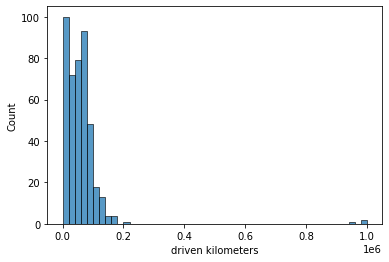

In [70]:
sns.histplot(data['driven kilometers'],bins=50)

C:\Users\SIVA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

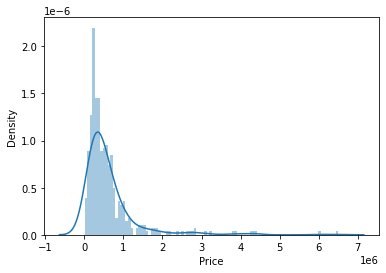

In [72]:
sns.distplot(data['Price'],bins=100)

<AxesSubplot:xlabel='driven kilometers', ylabel='Price'>

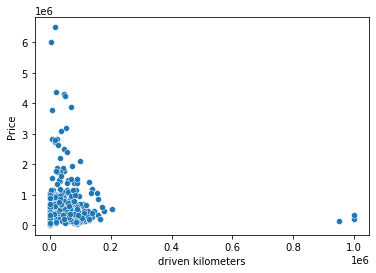

In [73]:
# relation between km and price

sns.scatterplot(data=data,x='driven kilometers',y='Price')

In [30]:
# We can clearly observe if km increse price will be decrese

In [74]:
data.groupby(['fuel']).mean()['Price'].sort_values()

fuel
ELECTRIC                         7.500000e+04
PETROL/COMPRESSED NATURAL GAS    1.690000e+05
LPG                              1.800000e+05
CNG                              3.583333e+05
CNG & HYBRIDS                    3.865385e+05
PETROL                           4.464897e+05
DIESEL                           8.223420e+05
--                               3.007500e+06
Name: Price, dtype: float64

We can observe some insights from the above data

Electric car price more cost comparing all other fuels

<AxesSubplot:xlabel='Transmission'>

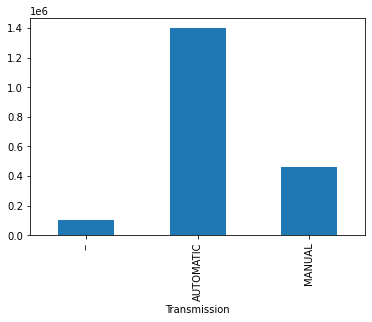

In [75]:
data.groupby(['Transmission']).mean()['Price'].plot(kind='bar')

Mostly Automatic transmission car selled in market

In [ ]:
# Automatic car price is more

<AxesSubplot:xlabel='Year'>

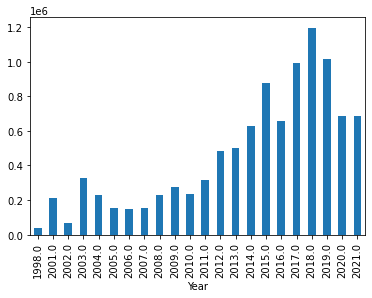

In [76]:
data.groupby(['Year']).mean()['Price'].plot(kind='bar')

if latest car price will be more and old car price less.

### Feature Engineering

- Handle null value

- Remove outlier

- corr

- Label encoding 

- scaling the data

In [77]:
from sklearn.impute import SimpleImputer

In [79]:
imputer = SimpleImputer(strategy="constant",fill_value='Unknown')
data['Brand'] = imputer.fit_transform(data['Brand'].values.reshape(-1, 1))

In [80]:
cat_list = ['Model','Variant','location']

for i in cat_list:
    data[i] = imputer.fit_transform(data[i].values.reshape(-1, 1))

In [82]:
imputer = SimpleImputer(strategy="median")
data['number of owners'] = imputer.fit_transform(data['number of owners'].values.reshape(-1, 1))

In [83]:
imputer = SimpleImputer(strategy="mean")
data['Price'] = imputer.fit_transform(data['Price'].values.reshape(-1, 1))

In [85]:
Uniq_list = ['Year','driven kilometers','fuel','Transmission']
imputer = SimpleImputer(strategy="most_frequent")

for i in Uniq_list:
    data[i] = imputer.fit_transform(data[i].values.reshape(-1, 1))

In [49]:
### All null values is handled as per the type of column

In [86]:
data.isna().sum()

Brand                0
Model                0
Variant              0
Year                 0
driven kilometers    0
fuel                 0
Transmission         0
number of owners     0
location             0
Price                0
dtype: int64

## Lable Encoding the string variables

In [87]:
cat_col = data.select_dtypes("object").columns.values

In [88]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [89]:
for i in cat_col:
    data[i] = label.fit_transform(data[i])
    
data.head()

,Brand,Model,Variant,Year,driven kilometers,fuel,Transmission,number of owners,location,Price
0,12,64,245,2010.0,127000.0,3,2,1.0,39,250000.0
1,6,92,274,2007.0,45000.0,6,2,2.0,18,210000.0
2,4,33,40,2015.0,20.0,3,2,2.0,104,651000.0
3,13,10,289,2016.0,58734.0,6,2,1.0,12,330000.0
4,13,100,229,2018.0,61000.0,3,2,1.0,103,620000.0


In [91]:
## Clean Data
data.to_csv(r"C:\Users\SIVA\DataScientiest\car_clean.csv")

### Spliting variable for traning and testing

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [93]:
X= data.drop(columns=['Price'],axis=1)
y = data['Price']

In [94]:
# Standarder Scaling
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)

StandardScaler()

In [97]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    score = r2_score(y_test,pred_test)
    if score > maxScore:
        maxScore = score
        maxRS = i
        
print(f"Best random state :{i} and Test r2 score:{maxScore}")

Best random state :199 and Test r2 score:0.5060695213729798


In [98]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=199)

In [110]:
## Performance of model
def performance(actual,prec):
    print("error")
    print("Mean absolute error",mean_absolute_error(actual,prec))
    print("mean square error",mean_squared_error(actual,prec))
    print("R2 Score :",r2_score(actual,prec))

In [112]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
prec =lr.predict(x_test)
performance(y_test,prec)

error
Mean absolute error 290444.52384481893
mean square error 295613604373.5729
R2 Score : 0.338089008868216


In [113]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [102]:
cross_ls = cross_val_score(LinearRegression(),X,y,cv=10)
cross_ls.mean()

0.25990804976967796

In [103]:
### Regularation Process
from sklearn.linear_model import Lasso

In [104]:
# Lasso Regrssion
le =Lasso(alpha=0.0001)
le.fit(x_train,y_train)
predict = le.predict(x_test)

performance(y_test,predict)

error
Mean absolute error 290444.52378582925
mean square error 295613604310.3559
R2 Score : 0.3380890090097657


In [105]:
cross_Val = cross_val_score(le,X,y,cv=10)
cross_Val.mean()

0.2599080499564229

### Saving the model

In [114]:
import joblib

In [115]:
Model_1 = joblib.dump(lr,"Car_Price_prediction.obj")